# Simple linear regression memodelkan hubungan antara sebuah response variable dengan sebuah explanatory variable sebagai suatu garis lurus (linear)

## Sample Dataset

In [4]:
import pandas as pd

pizza = {'diameter': [6, 8, 10, 14, 18],
        'harga' : [7, 9, 13, 17.5, 18]}

pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


## Visualisasi Data

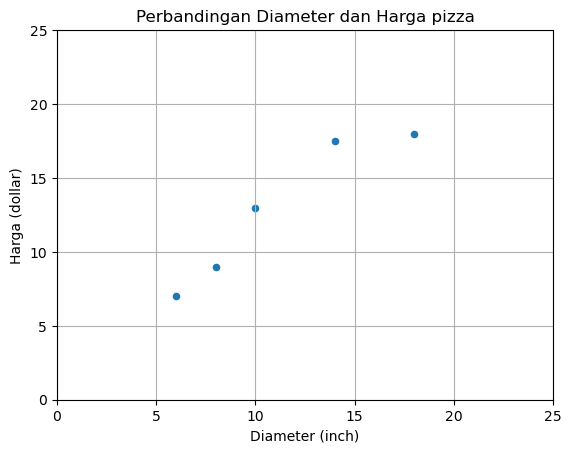

In [8]:
import matplotlib.pyplot as plt

pizza_df.plot(kind='scatter', x='diameter', y='harga')

plt.title('Perbandingan Diameter dan Harga pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
# x lim dan y lim ini digunakan untuk mengatur jangakauan sumbu x dan jangakauan sumbu y nya
plt.grid(True)
plt.show()


 ## Simple Linear Regression model

### Penyesuaian Dataset

In [11]:
# di konvert dari pandas ke numpy array
import numpy as np

X = np.array(pizza_df['diameter']) # feature
y = np.array(pizza_df['harga']) # Target

print(f'X : {X}')
print(f'y : {y}')

X : [ 6  8 10 14 18]
y : [ 7.   9.  13.  17.5 18. ]


In [12]:
X = X.reshape(-1, 1)
X.shape

(5, 1)

In [13]:
X

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]], dtype=int64)

## Training Simple Linear Regression Model

In [15]:
# kita import dulu estimeter classnya, dan kita pake LinearRegression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

## Visualisasi Simple Linear Regression Model

In [16]:
X_vis = np.array([0, 25]).reshape(-1, 1)
y_vis = model.predict(X_vis)

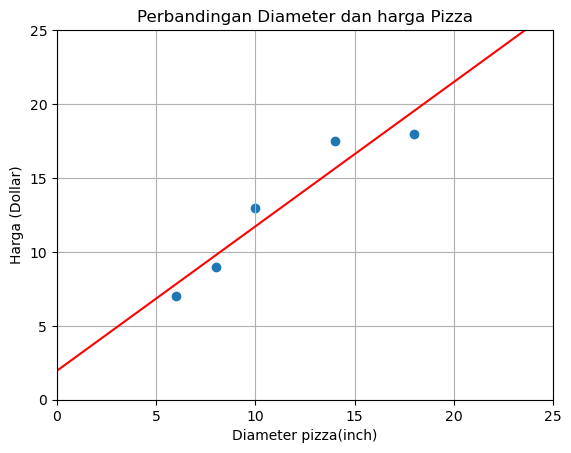

In [18]:
plt.scatter(X, y)
plt.plot(X_vis, y_vis, '-r') # garis merah hasi dari ploting X_vis dan y_vis
# '-r' menghasilnya garis lurus dan berwarna merah

plt.title('Perbandingan Diameter dan harga Pizza')
plt.xlabel('Diameter pizza(inch)')
plt.ylabel('Harga (Dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

# Formula Linear Regression: y = a + Bx
a = alpha
b = beta

- y: response variable (target)
- x: explanatory variable (feature)
- a: intercept 
- B: slope

### intercept merupakan titik pada sumbu y dimana garis linear yang terbentuk menambrak 
### Slope merupakan akan berpengaruh pada garis linear yang terbentuk, jika slope 0 akan menghasilkan garis horizontal

In [19]:
print(f'intercept : {model.intercept_}')
print(f'Slope : {model.coef_}')

intercept : 1.965517241379315
Slope : [0.9762931]


#### artinya interceptnya yang di y berada di 1.965

## Mencari nilai slope

### nilai slope pada linear regression bisa diperoleh dengan memanfaatkan formula berikut:

# B = cov(x,y)
        ----------
        var(x)

In [24]:
print(f'X;\n{X}\n')

# kita luruskan/ 1 dimensi menggunakan Flatten
print(f'X Flatten: {X.flatten()}\n')

print(f'y: {y}')

X;
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

X Flatten: [ 6  8 10 14 18]

y: [ 7.   9.  13.  17.5 18. ]


## Variance

In [28]:
variance_x = np.var(X.flatten(), ddof=1)
# ddof berbicara tentag digre of freedom 

print(f'variance : {variance_x}')

variance : 23.2


## Covariance

In [33]:
np.cov(X.flatten(), y)

# menghasilkan matrix

array([[23.2 , 22.65],
       [22.65, 24.3 ]])

#### Jadi kita ambil yang 22.65 di indexkan [0][1]

In [34]:
covariance_xy = np.cov(X.flatten(), y)[0][1]
print(f'covariance: {covariance_xy}')

covariance: 22.65


In [35]:
slope = covariance_xy / variance_x

print(f'slope : {slope}')

slope : 0.9762931034482758


## Mencari Nilai intercept

### nilai intercept pada linear regression bisa diperoleh dengan memanfaatkan formula berikut:

## a = - - -
      y   Bx

#### (B garis atas x)

In [37]:
intercept = np.mean(y) - slope * np.mean(X)

print(f'intercept : {intercept}')

intercept : 1.9655172413793114


##  Prediksi harga pizza

In [40]:
diameter_pizza = np.array([12, 20, 23]).reshape(-1, 1)
# 12, 20 ,23 adalah nilai feature yang mau kita prediksi

diameter_pizza

array([[12],
       [20],
       [23]])

In [41]:
predikis_harga = model.predict(diameter_pizza)
predikis_harga

# hasilnya berarti harga pizza (dollar)

array([13.68103448, 21.49137931, 24.42025862])

In [44]:
## melihat dengan jelasnya

# Looping dan printing
for dmtr, hrg in zip(diameter_pizza, predikis_harga):
    print(f'Diameter: {dmtr} Prediksi harga: {hrg}')

Diameter: [12] Prediksi harga: 13.681034482758621
Diameter: [20] Prediksi harga: 21.491379310344826
Diameter: [23] Prediksi harga: 24.42025862068965


## Evaluasi Simple Linear Regression model

### training & Testing Dataset

In [45]:
X_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y_train = np.array([7, 9, 13, 17.5, 18])

X_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1)
y_test = np.array([11, 8.5, 15, 18, 11])

#X_train → Diameter pizza (inch) yang dipakai untuk melatih model.
#y_train → Harga pizza (dalam dolar) yang sesuai dengan diameter tersebut (label yang diketahui).
#X_test → Diameter pizza yang nanti dipakai untuk menguji model.
#y_test → Harga asli dari pizza untuk data uji (nanti dibandingkan dengan hasil prediksi model).

### training Simple linear regression model

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Teknik Evulasi yang di pakai atau di pelajari

## Evaluasi Linear regression model dengan Coefficient of Determination atau R-squared (R akar 2)

In [47]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print(f'R-squared : {r_squared}')

R-squared : 0.6620052929422553


#### Nilai R-squared mendekati 1 itu semakin baik dan kebalikan

## Mencari nilai R-squared (R akar 2) 

### R akar 2 = 1 - SSres per SStot

### SESres(resedual) = sigma n i = 1 (yi - f(xi)) akar 2

### SEStot(total) = sigma n i= 1 (yi - garis atas y) akar 2

## SESRES

In [51]:
ss_res = sum([(y_i - model.predict(x_i.reshape(-1, 1)) [0])**2
              for x_i, y_i in zip(X_test, y_test)])

print(f'ses_res : {ss_res}')

ses_res : 19.1980993608799


## SEStot

In [52]:
mean_y =  np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])

print(f'ss_tot: {ss_tot}')

ss_tot: 56.8


## R akar 2

In [53]:
r_squared = 1 - (ss_res / ss_tot)

print(f'R-squared : {r_squared}')

R-squared : 0.6620052929422553


## 

## 